# Credit Card Fraud Detection Competition
### Quick and dirty dive into modelling without extensive feature generation  


## Context

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.


## Content

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.
Inspiration

Identify fraudulent credit card transactions.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

## Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## EDA

In [2]:
credit = pd.read_csv('data/creditcard.csv')

In [3]:
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
plt.style.use('bmh')

In [5]:
len(credit)

284807

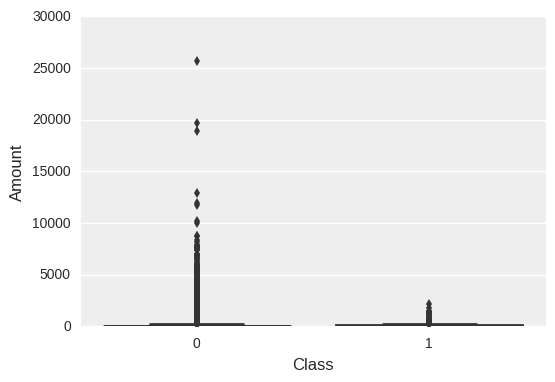

In [6]:
sns.boxplot(x='Class', y='Amount', data=credit)

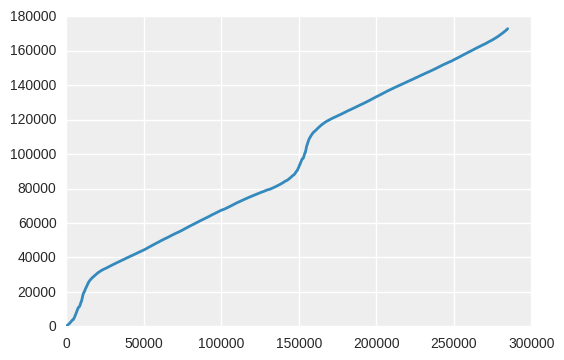

In [7]:
plt.plot(credit.Time)
plt.show()

In [8]:
60*60*24

86400

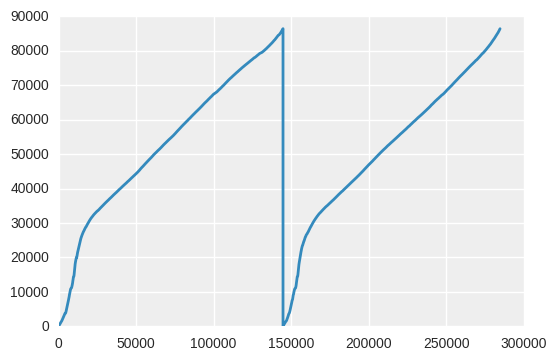

In [9]:
plt.plot(credit.Time.mod(86400))

In [5]:
credit['Time'] = credit.Time.mod(86400)

In [6]:
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
credit.Time.max()

86398.0

In [8]:
credit.iloc[:, -1].head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    credit.iloc[:, 0:-1], credit.iloc[:, -1], random_state=0)

## Modelling

## Random forest

In [6]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


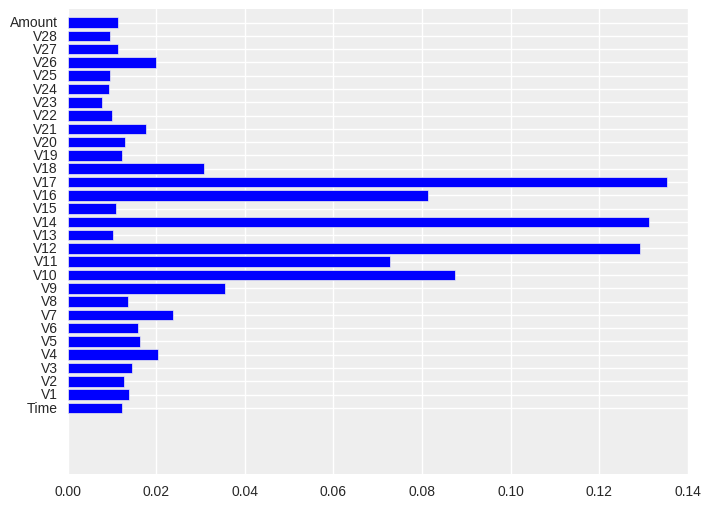

In [35]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.barh(range(len(X_train.columns)), forest.feature_importances_, align='center')
ax.set_yticks(range(len(X_train.columns)))
ax.set_yticklabels(X_train.columns)

plt.show()

In [22]:
from sklearn.metrics import average_precision_score
ap_rf = average_precision_score(y_test, forest.predict_proba(X_test)[:, 1])

print("Average precision of random forest: {:.3f}".format(ap_rf))

Average precision of random forest: 0.839


In [26]:
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test, forest.predict_proba(X_test)[:, 1])

print("AUC for Random Forest: {:.3f}".format(rf_auc))

AUC for Random Forest: 0.952


In [36]:
param_grid = {'n_estimators': [5, 50, 100], 
              'max_features': [1, 2, 5], 
              'max_depth': [2, 3, 5, 7]}

In [7]:
from sklearn.model_selection import GridSearchCV

In [37]:
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, n_jobs=-1)

In [38]:
%time grid_search.fit(X_train, y_train)

CPU times: user 1h 3min 18s, sys: 18 s, total: 1h 3min 36s
Wall time: 38min


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 3, 5, 7], 'n_estimators': [5, 50, 100], 'max_features': [1, 2, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [39]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_depth': 7, 'n_estimators': 100, 'max_features': 5}
Best cross-validation score: 1.00


In [42]:
print("Test set score: {:.8f}".format(grid_search.score(X_test, y_test)))

Test set score: 0.99945226


In [41]:
rf_auc = roc_auc_score(y_test, grid_search.predict_proba(X_test)[:, 1])

print("AUC for Random Forest: {:.3f}".format(rf_auc))

AUC for Random Forest: 0.964


In [49]:
from sklearn.metrics import f1_score

In [51]:
print("f1 score tree: {:.8f}".format(f1_score(y_test, grid_search.predict(X_test))))

f1 score tree: 0.82027650


In [52]:
from sklearn.metrics import classification_report

In [53]:
print(classification_report(y_test, forest.predict(X_test)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     71082
          1       0.94      0.80      0.86       120

avg / total       1.00      1.00      1.00     71202



In [72]:
y_pred_lower_threshold = forest.predict_proba(X_test)[:, 1] > .3

print(classification_report(y_test, y_pred_lower_threshold))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     71082
          1       0.89      0.81      0.85       120

avg / total       1.00      1.00      1.00     71202



In [13]:
param_grid = {'max_features': [2, 4, 7], 
              'max_depth': [2, 5, 7]}

In [14]:
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, n_jobs=-1, scoring='f1')

In [15]:
%time grid_search.fit(X_train, y_train)

CPU times: user 25 s, sys: 160 ms, total: 25.1 s
Wall time: 3min 44s


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_depth': [2, 5, 7], 'max_features': [2, 4, 7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0)

In [17]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Test set score: {:.8f}".format(grid_search.score(X_test, y_test)))
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test, grid_search.predict_proba(X_test)[:, 1])
print("AUC for Random Forest: {:.3f}".format(rf_auc))
from sklearn.metrics import classification_report
print(classification_report(y_test, grid_search.predict(X_test)))

Best parameters: {'max_depth': 7, 'max_features': 7}
Best cross-validation score: 0.84
Test set score: 0.82790698
AUC for Random Forest: 0.954
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     71082
          1       0.94      0.74      0.83       120

avg / total       1.00      1.00      1.00     71202



In [13]:
param_grid = {'max_features': [13, 14], 'max_depth': [10, 11]}
grid_search = GridSearchCV(RandomForestClassifier(random_state=0), param_grid, cv=5, n_jobs=-1, scoring='roc_auc')
%time grid_search.fit(X_train, y_train)

CPU times: user 52.5 s, sys: 132 ms, total: 52.6 s
Wall time: 8min 46s


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [13, 14], 'max_depth': [10, 11]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [14]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Test set score: {:.8f}".format(grid_search.score(X_test, y_test)))
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test, grid_search.predict_proba(X_test)[:, 1])
print("AUC for Random Forest: {:.3f}".format(rf_auc))
from sklearn.metrics import classification_report
print(classification_report(y_test, grid_search.predict(X_test)))

Best parameters: {'max_features': 14, 'max_depth': 10}
Best cross-validation score: 0.97
Test set score: 0.97453118
AUC for Random Forest: 0.975
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     71082
          1       0.95      0.78      0.86       120

avg / total       1.00      1.00      1.00     71202



In [15]:
forest = RandomForestClassifier(
    random_state=0, 
    n_jobs=-1, 
    max_depth=10, 
    max_features=14, 
    n_estimators=200)
%time forest.fit(X_train, y_train)

CPU times: user 16min 51s, sys: 1.86 s, total: 16min 52s
Wall time: 9min 6s


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features=14, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [16]:
print("Test set score: {:.8f}".format(forest.score(X_test, y_test)))
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test, forest.predict_proba(X_test)[:, 1])
print("AUC for Random Forest: {:.3f}".format(rf_auc))
from sklearn.metrics import classification_report
print(classification_report(y_test, forest.predict(X_test)))

Test set score: 0.99956462
AUC for Random Forest: 0.973
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     71082
          1       0.94      0.79      0.86       120

avg / total       1.00      1.00      1.00     71202



In [24]:
for threshold in np.linspace(.1, .9, 9):
    print('With threshold: {}'.format(threshold))
    rf_auc = roc_auc_score(y_test, forest.predict_proba(X_test)[:, 1] > threshold)
    print("AUC: {:.3f}".format(threshold, rf_auc))
    print('Classifiation report: ')
    print(classification_report(y_test, forest.predict_proba(X_test)[:, 1] > threshold))

With threshold: 0.1
AUC: 0.100
Classifiation report: 
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     71082
          1       0.76      0.85      0.80       120

avg / total       1.00      1.00      1.00     71202

With threshold: 0.2
AUC: 0.200
Classifiation report: 
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     71082
          1       0.86      0.84      0.85       120

avg / total       1.00      1.00      1.00     71202

With threshold: 0.30000000000000004
AUC: 0.300
Classifiation report: 
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     71082
          1       0.88      0.82      0.85       120

avg / total       1.00      1.00      1.00     71202

With threshold: 0.4
AUC: 0.400
Classifiation report: 
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     71082
          1     